__Ejercicio 1:__ ¿Como podemos evaluar funciones en matrices?
__Hint:__ ¿que operaciones sabemos que estan bien definidas sobre matrices?

Sabemos que el producto es una operación que está bien definida sobre matrices. Por tal motivo, si queremos evaluar una función $f$ sobre una matriz $A$, resulta conveniente definir tal operación por medio de la serie de Taylor:

$$f(A)= \sum_{n=0}^{\infty} \frac{1}{n!} f^{(n)}(0) A^{n}, $$

donde $f^{(n)}$ denota la derivada n-ésima de $f$ ($f^{(0)}=f$) y $A^{n}$ significa multiplicar la matriz $A$ n veces ($A^{0}=I$, la matriz identidad.)

__Ejercicio 2:__ ¿Como se define una matriz simétrica?

Consideremos una matriz $A$ de $n\times n$, cuyas entradas denotamos por $A_{i\ j}$, donde $i$ indica el número de reglón y $j$ el número de columna.
Una matriz simétrica se define como aquella que cumple que
$$A_{i\ j}=A_{j\ i}$$
para todo $i,j=1,...,n$.

__Ejercicio 3:__ ¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?

Consideremos la matriz $A$ de $n\times n$, cuyas entradas son $A_{i\ j}$. La matriz transpuesta de $A$, denotada como $A^{T}$, es aquella matriz cuyas entradas son
$$A^{T}_{i\ j}=A_{j\ i},$$
para todo $i,j=1,...n.$

Así, podemos ver que si hacemos la operación $A+A^{T}$, obtenemos que las entradas de la nueva matriz serán
$$(A+A^{T})_{i\ j}=A_{i\ j}+A^{T}_{i\ j}=A_{i\ j}+A_{j\ i},$$

Lo cual implica que
$$(A+A^{T})_{j\ i}=A_{j\ i}+A_{i\ j}=A_{i\ j}+A_{j\ i}=(A+A^{T})_{i\ j}.$$

Por lo tanto $A+A_{T}$ es una matriz simétrica.

De este modo, se puede ver que dada cualquier matriz cuadrada, se puede obtener una matriz simétrica si se suma con su transpuesta.

__Ejercicio 4:__ Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice:
$$A=\left(\begin{array}{cc} -1 & 1\\ -1 & -1 \end{array} \right).$$
* Grafique la trayectoria en el espacio de fase.
* Recuerde que $\vec x(t) = e^{A t}\vec x_0$, y necesitamos graficar la trayectoria $\vec x(t)$ en el espacio de fase.

En este ejercicio usarmos que si $D$ es es la matriz diagonal de eigenvalores de $A$, es decir, $A=wDw^{-1}$ (donde $w$ es la matriz cuyas columnas son los eigenvectores de A), entonces $tA=t(wDw^{-1})=w(tD)w^{-1}$. Es decir, la misma $w$ sirve para diagonalizar $A$ y $tA$

In [1]:
using PyPlot

In [2]:
#Definimos la matriz
A=[-1 1; -1 -1];
#Definimos la matriz cuyas columnas son los eigenvectores de A
w=eigvecs(A);
#Definimos la matriz diagonal, cuyos elementos son los eigenvalores de A
D=diagm(eigvals(A));

In [3]:
#Definimos un arreglo de tiempos
timelist=0:0.01:10

0.0:0.01:10.0

In [4]:
#Definimos la condición inicial
x0=[1,0]
#Definimos un arreglo vacío, donde iremos guardadno la solución
xlist=[]

#Usamos el for para ir guardando las entradas de xlist
for i in 1:length(timelist)
#Definimos e, que es la matrix exponencial de tA, dada por we^{tD}w^{-1}. como se explicó anteriormente
    e=w*(exp.(timelist[i]*D))*inv(w)
#Multiplicamos la condición inicial por la matriz exponencial  #Nótese que la primera entrada será en efecto x0, pues para i=1, t=0, y e será la matriz identidad en tal caso.
    x=e*x0
#Guardamos en xlist
    push!(xlist, x)  
end

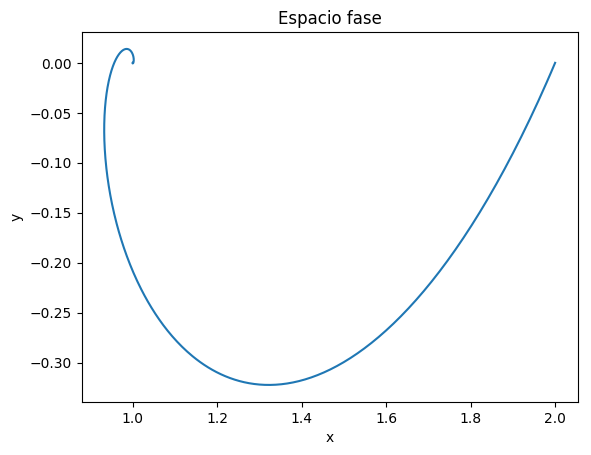

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [5]:
#Usamos map para extraer las entradas correspondientes
x=map(x->x[1],xlist)
y=map(x->x[2],xlist)
#Graficamos

plot(x,y)
xlabel("x")
ylabel("y")
title("Espacio fase");